In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/MuraDataset')

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, load_img
# from keras_preprocessing.image import ImageDataGenerator,load_img
from keras.applications.densenet import DenseNet169
from keras.models import Model
from keras import layers
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint


from sklearn.model_selection import train_test_split

In [4]:
os.listdir("/content/drive/MyDrive/MuraDataset/MURA-v1.1")

['train_labeled_studies.csv',
 'valid_labeled_studies.csv',
 'train_image_paths.csv',
 'valid_image_paths.csv',
 'train_images_display_copy.csv',
 'train_images_display.csv',
 'valid',
 'train']

In [5]:
# Train set studies with labels
df=pd.read_csv('/content/drive/MyDrive/MuraDataset/MURA-v1.1/train_labeled_studies.csv', names=['Train_Image','Train_Label'])

In [6]:
df.head()

,Train_Image,Train_Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [7]:
# Adding labels to individual images in train set
df1=pd.read_csv('/content/drive/MyDrive/MuraDataset/MURA-v1.1/train_image_paths.csv', names=['Train_Image'])
df1 = df1[df1['Train_Image'].str.split('/').str[2]== 'XR_HAND']
names=df1['Train_Image'].values


In [8]:
train_labels=[]

for i in names:
    if ('positive' in i):
        train_labels.append('1')
    elif('negative' in i):
        train_labels.append('0')

train_labels = np.array(train_labels)
#labels = pd.DataFrame(labels, columns=['Image', 'Label'])
df1.insert(1, 'Train_Label', train_labels)

In [9]:
print(train_labels)

['1' '1' '1' ... '0' '0' '0']


In [10]:
df1.head()

,Train_Image,Train_Label
31265,MURA-v1.1/train/XR_HAND/patient09734/study1_po...,1
31266,MURA-v1.1/train/XR_HAND/patient09734/study1_po...,1
31267,MURA-v1.1/train/XR_HAND/patient09734/study1_po...,1
31268,MURA-v1.1/train/XR_HAND/patient09735/study1_po...,1
31269,MURA-v1.1/train/XR_HAND/patient09735/study1_po...,1


In [11]:
df1.shape

(5543, 2)

In [12]:
df1['Train_Image'] = '/content/drive/MyDrive/MuraDataset/' + df1['Train_Image']

In [13]:
df1.to_csv('Train_set.csv', index=False)

In [14]:
#Validation set studies with labels
df_valid=pd.read_csv('/content/drive/MyDrive/MuraDataset/MURA-v1.1/valid_labeled_studies.csv', names=['Valid_Image','Valid_Label'])

In [15]:
df_valid.head()

,Valid_Image,Valid_Label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1


In [16]:
# Adding labels to individual images in validation set
df_valid1=pd.read_csv('/content/drive/MyDrive/MuraDataset/MURA-v1.1/valid_image_paths.csv', names=['Valid_Image'])
df_valid1 = df_valid1[df_valid1['Valid_Image'].str.split('/').str[2]== 'XR_HAND']
names=df_valid1['Valid_Image'].values
valid_labels=[]

for i in names:
  if ('positive' in i):
    valid_labels.append('1')
  elif('negative' in i):
    valid_labels.append('0')

valid_labels = np.array(valid_labels)
#labels = pd.DataFrame(labels, columns=['Image', 'Label'])
df_valid1.insert(1, 'Valid_Label', valid_labels)
df_valid1.to_csv('Valid_set.csv', index=False)

In [17]:
df_valid1.head()

,Valid_Image,Valid_Label
960,MURA-v1.1/valid/XR_HAND/patient11497/study1_po...,1
961,MURA-v1.1/valid/XR_HAND/patient11497/study1_po...,1
962,MURA-v1.1/valid/XR_HAND/patient11497/study1_po...,1
963,MURA-v1.1/valid/XR_HAND/patient11498/study1_po...,1
964,MURA-v1.1/valid/XR_HAND/patient11498/study1_po...,1


In [18]:
df_valid1.shape

(460, 2)

In [19]:
df_valid1['Valid_Image'] = '/content/drive/MyDrive/MuraDataset/' + df_valid1['Valid_Image']
df_valid1.to_csv('Valid_set.csv', index=False)

In [20]:
# Read Training and Validation .csv files
train_df = pd.read_csv("./Train_set.csv", dtype=str)
# valid_df = pd.read_csv("./Valid_set.csv", dtype=str)

In [21]:
valid_df = pd.read_csv("./Valid_set.csv", dtype=str)

In [22]:
train_df_part = train_df[:4000]
print(len(train_df_part))

4000


In [23]:
train_data, test_data = train_test_split(train_df_part, test_size=0.1,random_state=13,stratify = train_df_part['Train_Label'])

In [24]:
train_samples = pd.DataFrame(train_data)
test_samples = pd.DataFrame(test_data)

In [25]:
print(len(train_samples))
print(len(test_samples))

3600
400


In [26]:
# Import DenseNet169 pre-trained model
dense_model = DenseNet169(include_top=False, weights='imagenet',pooling = 'avg')

51888128/51877672 [==============================] - 1s 0us/step


In [27]:
#Freeze the layers
dense_model.trainable = False

In [28]:
for layer in dense_model.layers[586:]:
    layer.trainable = True

    
for layer in dense_model.layers:
    print(layer,layer.trainable)     

<keras.engine.input_layer.InputLayer object at 0x7fa5acfe2690> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa55fd5ce50> False
<keras.layers.convolutional.Conv2D object at 0x7fa55fd89390> False
<keras.layers.normalization_v2.BatchNormalization object at 0x7fa55ff13cd0> False
<keras.layers.core.Activation object at 0x7fa55f4ae610> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa55f4bec90> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa55bd5ecd0> False
<keras.layers.normalization_v2.BatchNormalization object at 0x7fa55bd68c50> False
<keras.layers.core.Activation object at 0x7fa55bd5c690> False
<keras.layers.convolutional.Conv2D object at 0x7fa55bd6a1d0> False
<keras.layers.normalization_v2.BatchNormalization object at 0x7fa55bcf9350> False
<keras.layers.core.Activation object at 0x7fa55bcfe5d0> False
<keras.layers.convolutional.Conv2D object at 0x7fa55bd71ed0> False
<keras.layers.merge.Concatenate object at 0x7fa55bd038d0> False
<keras.layers.norma

In [29]:
predictions = Dense(1, activation='sigmoid')(dense_model.layers[-1].output)
model = Model(inputs=dense_model.input, outputs=predictions)

In [30]:
filepath = '/content/drive/MyDrive/MuraDataset/'
model.load_weights(filepath+'bestmodel/handmodel-00009-0.23405-0.73972-0.23953-0.73250.h5',by_name = True)

In [31]:
import cv2
def get_testdata():
    image_data = []
    x_data = []
    y_data = []
    for index, row in test_samples.iterrows():
        image_data_temp = cv2.imread(row[0],cv2.IMREAD_COLOR)                 # Read Image as numbers
        image_temp_resize = cv2.resize(image_data_temp,(300,300))
        image_data.append([image_temp_resize,row[1]])
    data = np.asanyarray(image_data)    

    for x in data:
        x_data.append(x[0])        # Get the X_Data
        y_data.append(x[1])        # get the label
              
    X_Data = np.asarray(x_data) / (255.0)      # Normalize Data
    Y_Data = np.asarray(y_data)
        
            # reshape x_Data

    X_Data = X_Data.reshape(-1, 300, 300, 3)

    return X_Data,Y_Data

In [32]:
testx1,testy1 = get_testdata()
print(testx1.shape)
print(testy1.shape)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


(400, 300, 300, 3)
(400,)


In [33]:
testy1 = list(map(int, testy1))

In [34]:
# predict probabilities for test set
y_probs = model.predict(testx1 , verbose=0)
# predict crisp classes for test set
y_classes = (y_probs > 0.5).astype('int32')


In [35]:
# reduce to 1d array
y_probs = y_probs[:, 0]
y_classes = y_classes[:, 0]

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix

In [37]:
# accuracy: (tp + tn) / (p + n)
test_accuracy = accuracy_score(testy1, y_classes)
print('Accuracy: %f' % test_accuracy)
# precision tp / (tp + fp)
test_precision = precision_score(testy1, y_classes)
print('Precision: %f' % test_precision)
# recall: tp / (tp + fn)
test_recall = recall_score(testy1, y_classes)
print('Recall: %f' % test_recall)
# f1: 2 tp / (2 tp + fp + fn)
test_f1 = f1_score(testy1, y_classes)
print('F1 score: %f' % test_f1)
# kappa
test_kappa = cohen_kappa_score(testy1, y_classes)
print('Cohens kappa: %f' % test_kappa)
# ROC AUC
test_auc = roc_auc_score(testy1, y_probs)
print('ROC AUC: %f' % test_auc)
# confusion matrix
test_matrix = confusion_matrix(testy1, y_classes)
print(test_matrix)

Accuracy: 0.745000
Precision: 0.638554
Recall: 0.716216
F1 score: 0.675159
Cohens kappa: 0.466416
ROC AUC: 0.827327
[[192  60]
 [ 42 106]]


In [38]:
from sklearn.metrics import roc_curve
fpr_test, tpr_test, thresholds_test = roc_curve(testy1, y_probs)

In [39]:
from sklearn.metrics import auc
auc_test = auc(fpr_test, tpr_test)

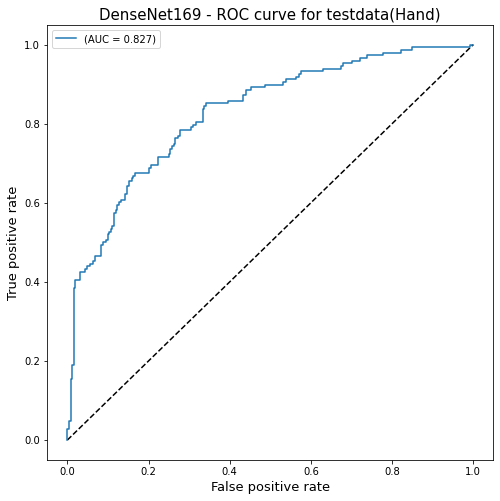

In [40]:
plt.figure(1,figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_test, tpr_test, label='(AUC = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate',fontsize=13)
plt.ylabel('True positive rate',fontsize=13)
plt.title('DenseNet169 - ROC curve for testdata(Hand)',fontsize=15)
plt.legend(loc='best')
plt.savefig(filepath+'denseroctest_hand',dpi=300)
plt.show()

In [41]:
import cv2
def get_data():
    image_data = []
    x_data = []
    y_data = []
    for index, row in valid_df.iterrows():
        image_data_temp = cv2.imread(row[0],cv2.IMREAD_COLOR)                 # Read Image as numbers
        image_temp_resize = cv2.resize(image_data_temp,(300,300))
        image_data.append([image_temp_resize,row[1]])
    data = np.asanyarray(image_data)    

    for x in data:
        x_data.append(x[0])        # Get the X_Data
        y_data.append(x[1])        # get the label
              
    X_Data = np.asarray(x_data) / (255.0)      # Normalize Data
    Y_Data = np.asarray(y_data)
        
            # reshape x_Data

    X_Data = X_Data.reshape(-1, 300, 300, 3)

    return X_Data,Y_Data

In [42]:
testX,testY = get_data()
testY = list(map(int, testY))


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [43]:
# predict probabilities for test set
yhat_probs = model.predict(testX , verbose=0)
# predict crisp classes for test set
yhat_classes = (yhat_probs > 0.5).astype('int32')


In [44]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [45]:
print(yhat_probs)

[0.84837747 0.65038216 0.5346521  0.9924835  0.91087025 0.9886209
 0.87461805 0.9588045  0.80338055 0.8022064  0.83270216 0.7601585
 0.8208722  0.8947458  0.99608046 0.9842719  0.64635485 0.90931714
 0.9337423  0.92553174 0.9365035  0.9415707  0.9814883  0.7384063
 0.67678547 0.42550626 0.5783921  0.7368691  0.7096015  0.4682132
 0.42691016 0.8655796  0.8709521  0.95428807 0.956324   0.28526157
 0.27185947 0.9912082  0.9671298  0.9434761  0.16564965 0.7752409
 0.88320255 0.89062566 0.6995212  0.9743031  0.8966504  0.90567887
 0.2883945  0.27556628 0.4436086  0.40239397 0.37349468 0.92143536
 0.87565494 0.94516695 0.5942728  0.13945174 0.48331177 0.8632475
 0.8697669  0.9528231  0.7382197  0.89356947 0.6307011  0.35534924
 0.12715289 0.52912873 0.80881655 0.3594343  0.3834895  0.27072364
 0.35745928 0.8770827  0.1478805  0.77668583 0.9765841  0.90266323
 0.81303775 0.6581352  0.3636508  0.8969243  0.52623594 0.48145175
 0.3114404  0.55272627 0.6275539  0.7895402  0.80139244 0.4877805
 0

In [46]:
print(yhat_classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1
 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]


In [47]:
print(testY)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix

In [49]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testY, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testY, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testY, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.745652
Precision: 0.676471
Recall: 0.730159
F1 score: 0.702290


In [50]:
# kappa
kappa = cohen_kappa_score(testY, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testY, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testY, yhat_classes)
print(matrix)

Cohens kappa: 0.480843
ROC AUC: 0.842715
[[205  66]
 [ 51 138]]


In [51]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY, yhat_probs)

In [52]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

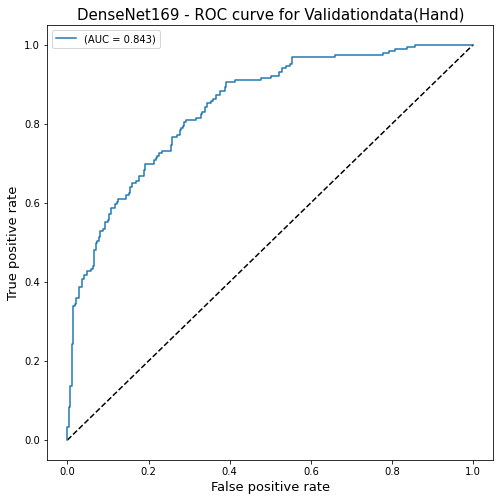

In [53]:
plt.figure(1,figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='(AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate',fontsize=13)
plt.ylabel('True positive rate',fontsize=13)
plt.title('DenseNet169 - ROC curve for Validationdata(Hand)',fontsize=15)
plt.legend(loc='best')
plt.savefig(filepath+'denserocvalidation_hand',dpi=300)
plt.show()
